# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

___

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



___
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

___
<a id='step0'></a>

## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
!mkdir data
!mkdir output

In [2]:
!wget -P data https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2021-12-03 23:55:28--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 3.5.161.171
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|3.5.161.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘data/dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  12.4MB/s    in 1m 53s  

2021-12-03 23:57:22 (9.59 MB/s) - ‘data/dogImages.zip’ saved [1132023110/1132023110]



In [3]:
!unzip data/dogImages.zip -d data
!rm data/dogImages.zip
!mv data/dogImages data/dog_images

Archive:  data/dogImages.zip
   creating: data/dogImages/
   creating: data/dogImages/test/
   creating: data/dogImages/train/
   creating: data/dogImages/valid/
   creating: data/dogImages/test/001.Affenpinscher/
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: data/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: data/dogImages/test/002.Afghan_hound/
  inflating: data/dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: data/dogImages/test/002.Afghan_

In [4]:
!wget -P data https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2021-12-03 23:58:12--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.104
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘data/lfw.zip’

lfw.zip             100%[===================>] 187.62M  9.95MB/s    in 31s     

2021-12-03 23:58:44 (6.06 MB/s) - ‘data/lfw.zip’ saved [196739509/196739509]



In [5]:
!unzip data/lfw.zip -d data
!rm data/lfw.zip
!rm -rf data/__MACOSX

Archive:  data/lfw.zip
   creating: data/lfw/
  inflating: data/lfw/.DS_Store      
   creating: data/__MACOSX/
   creating: data/__MACOSX/lfw/
  inflating: data/__MACOSX/lfw/._.DS_Store  
   creating: data/lfw/Aaron_Eckhart/
  inflating: data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: data/__MACOSX/lfw/Aaron_Eckhart/
  inflating: data/__MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: data/__MACOSX/lfw/._Aaron_Eckhart  
   creating: data/lfw/Aaron_Guiel/
  inflating: data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: data/__MACOSX/lfw/Aaron_Guiel/
  inflating: data/__MACOSX/lfw/Aaron_Guiel/._Aaron_Guiel_0001.jpg  
  inflating: data/__MACOSX/lfw/._Aaron_Guiel  
   creating: data/lfw/Aaron_Patterson/
  inflating: data/lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: data/__MACOSX/lfw/Aaron_Patterson/
  inflating: data/__MACOSX/lfw/Aaron_Patterson/._Aaron_Patterson_0001.jpg  
  inflating: data/__MACOSX/lfw/._Aaron_Patterson  
   creating: dat

In [6]:
import numpy as np
from glob import glob

HUMAN_FOLDER = "data/lfw"
DOG_FOLDER = "data/dog_images"

# load filenames for human and dog images
human_files = np.array(glob(f"{HUMAN_FOLDER}/*/*"))
dog_files = np.array(glob(f"{DOG_FOLDER}/*/*/*"))

# print number of images in each dataset
print(f'There are {len(human_files)} total human images.')
print(f'There are {len(dog_files)} total dog images.')

There are 13233 total human images.
There are 8351 total dog images.


___
<a id='step1'></a>

## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


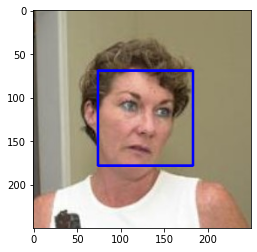

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [9]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

def get_human_perc(file_list):
    total_files = len(file_list)

    human_count = 0
    for file in tqdm(file_list):
        if face_detector(file):
            human_count += 1

    return human_count / total_files * 100

human_perc_human_files = get_human_perc(human_files_short)
human_perc_dog_files = get_human_perc(dog_files_short)
    
print(f'Detected human faces in {human_perc_human_files}% of the human files.')
print(f'Detected human faces in {human_perc_dog_files}% of the dog files.')

100%|██████████| 100/100 [00:12<00:00,  7.85it/s]

Detected human faces in 100.0% of the human files.
Detected human faces in 11.0% of the dog files.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

___
<a id='step2'></a>

## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 108155038.40it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [11]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

    
    img = Image.open(img_path)
    img_t = transform(img)
    batch_t = img_t.unsqueeze(0)

    VGG16.eval()

    if use_cuda:
        batch_t = batch_t.cuda()
    
    out = VGG16(batch_t)

    if use_cuda:
        out = out.cpu()

    index = out.detach().numpy().argmax()
    
    return index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    return 151 <= VGG16_predict(img_path) <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [13]:
def get_dog_perc(file_list):
    total_files = len(file_list)

    dog_count = 0
    for file in tqdm(file_list):
        if dog_detector(file):
            dog_count += 1

    return dog_count / total_files * 100

dog_perc_human_files = get_dog_perc(human_files_short)
dog_perc_dog_files = get_dog_perc(dog_files_short)
    
print(f'Detected dogs in {dog_perc_human_files}% of the human files.')
print(f'Detected dogs in {dog_perc_dog_files}% of the dog files.')

100%|██████████| 100/100 [00:08<00:00, 12.26it/s]

Detected dogs in 0.0% of the human files.
Detected dogs in 99.0% of the dog files.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

___
<a id='step3'></a>

## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [15]:
!pygmentize src/loaders.py

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets


def get_loaders(
    resize, crop_size, degrees, flip_prob, batch_size, train_dir, valid_dir, test_dir
):
    print("Get train data loader.")

    transform_train = transforms.Compose(
        [
            transforms.RandomRotation(degrees),
            transforms.RandomResizedCrop(crop_size),
            transforms.RandomHorizontalFlip(flip_prob),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

    transform_valid_test = transforms.Compose(
        [
            transforms.Resize(resize),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

    train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
    valid_dataset = datasets.ImageFolder(val

In [16]:
from src.loaders import get_loaders

CROP_SIZE = 224

loaders_scratch = get_loaders(
    resize=256,
    crop_size=CROP_SIZE,
    degrees=30,
    flip_prob=0.5,
    batch_size=20,
    train_dir=f"{DOG_FOLDER}/train",
    valid_dir=f"{DOG_FOLDER}/valid",
    test_dir=f"{DOG_FOLDER}/test",
)

Get train data loader.


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
- I resized the images to 64 pixels and cropped them to square shapes of 64x64 pixels about the center. I chose this size so that the model wouldn't have so many parameters. Also, I applied normalization on the tensors.
- At first, I didn't do any augmentation because I wanted to see the results I could obtain from the dataset as it was. However, it was necessary to augment the data to reach the requested accuracy, so I used random erasing and random horizontal flip.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [17]:
!pygmentize src/model.py

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(
        self,
        input_dim,
        conv1_out_dim,
        conv2_out_dim,
        conv3_out_dim,
        conv_kernel_size,
        pool_kernel_size,
        drop_prob,
        hidden_dim,
        output_dim,
    ):
        super(Net, self).__init__()

        self.hidden_dim = hidden_dim

        self.conv1 = nn.Conv2d(input_dim, conv1_out_dim, conv_kernel_size, padding=1)
        self.bn1 = nn.BatchNorm2d(conv1_out_dim)

        self.conv2 = nn.Conv2d(
            conv1_out_dim, conv2_out_dim, conv_kernel_size, padding=1
        )
        self.bn2 = nn.BatchNorm2d(conv2_out_dim)

        self.conv3 = nn.Conv2d(
            conv2_out_dim, conv3_out_dim, conv_kernel_size, padding=1
        )
        self.bn3 = nn.BatchNorm2d(conv3_out_dim)

        self.pool = nn.MaxPool2d(pool_kernel_size)
        self.dropout = nn.Dropout(drop_prob)
        self.fc1 = nn.Linear(self.hidden_dim, output_

In [18]:
from src.model import Net
import math

CONV3_OUT_DIM = 32
POOL_KERNEL_SIZE = 2
HIDDEN_DIM = CONV3_OUT_DIM * (math.floor(CROP_SIZE / POOL_KERNEL_SIZE ** 3)) ** 2
OUTPUT_DIM = 133

model_scratch = Net(
    input_dim=3,
    conv1_out_dim=8,
    conv2_out_dim=16,
    conv3_out_dim=CONV3_OUT_DIM,
    conv_kernel_size=3,
    pool_kernel_size=POOL_KERNEL_SIZE,
    drop_prob=0.5,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
)

if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I started with one convolutional block consisting of a convolution layer and batch normalization. The output of this block would pass through a dropout layer and finally a linear layer.
I realized that adding more convolutional blocks increasing the output channels would improve the performance, so I ended up with three of these convolutional blocks.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.nn as nn
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
!pygmentize src/train.py

import torch
import numpy as np

from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""

    valid_loss_min = np.Inf

    for epoch in range(1, n_epochs + 1):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        for batch_idx, (data, target) in enumerate(loaders["train"]):

            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            train_loss += (1 / (batch_idx + 1)) * (loss.data - train_loss)

        model.eval()
        for batch_idx, (data, target) in enumerate(loaders["valid"]):

            if use_cuda:
                data, target = data.cuda(), target.cuda()

            outputs = model(data)
            loss = criterion(o

In [21]:
from src.train import train

MODEL_PATH_SCRATCH = "output/model_scratch.pt"

model_scratch = train(
    n_epochs=80,
    loaders=loaders_scratch,
    model=model_scratch,
    optimizer=optimizer_scratch,
    criterion=criterion_scratch,
    use_cuda=use_cuda,
    save_path=MODEL_PATH_SCRATCH,
)

model_scratch.load_state_dict(torch.load(MODEL_PATH_SCRATCH))

Epoch: 1 	Training Loss: 5.311902 	Validation Loss: 4.677318
Epoch: 2 	Training Loss: 4.691515 	Validation Loss: 4.458751
Epoch: 3 	Training Loss: 4.532137 	Validation Loss: 4.379782
Epoch: 4 	Training Loss: 4.475031 	Validation Loss: 4.325643
Epoch: 5 	Training Loss: 4.452435 	Validation Loss: 4.268369
Epoch: 6 	Training Loss: 4.414458 	Validation Loss: 4.245440
Epoch: 7 	Training Loss: 4.374433 	Validation Loss: 4.214429
Epoch: 8 	Training Loss: 4.332580 	Validation Loss: 4.188581
Epoch: 9 	Training Loss: 4.302720 	Validation Loss: 4.198247
Epoch: 10 	Training Loss: 4.261939 	Validation Loss: 4.159319
Epoch: 11 	Training Loss: 4.237707 	Validation Loss: 4.119228
Epoch: 12 	Training Loss: 4.230113 	Validation Loss: 4.094180
Epoch: 13 	Training Loss: 4.216682 	Validation Loss: 4.089977
Epoch: 14 	Training Loss: 4.151691 	Validation Loss: 4.063875
Epoch: 15 	Training Loss: 4.150238 	Validation Loss: 4.049893
Epoch: 16 	Training Loss: 4.133075 	Validation Loss: 4.052633
Epoch: 17 	Traini

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
!pygmentize src/test.py

import numpy as np


def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders["test"]):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss += (1 / (batch_idx + 1)) * (loss.data - test_loss)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print("Test Loss: {:.6f}\n".format(test_loss))

    print(
        "\nTest Accuracy: %2d%% (%2d/%2d)

In [23]:
from src.test import test

# call test function
test(
    loaders=loaders_scratch,
    model=model_scratch,
    criterion=criterion_scratch,
    use_cuda=use_cuda,
)

Test Loss: 3.358547


Test Accuracy: 22% (184/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
!pygmentize src/loaders.py

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets


def get_loaders(
    resize, crop_size, degrees, flip_prob, batch_size, train_dir, valid_dir, test_dir
):
    print("Get train data loader.")

    transform_train = transforms.Compose(
        [
            transforms.RandomRotation(degrees),
            transforms.RandomResizedCrop(crop_size),
            transforms.RandomHorizontalFlip(flip_prob),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

    transform_valid_test = transforms.Compose(
        [
            transforms.Resize(resize),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

    train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
    valid_dataset = datasets.ImageFolder(val

In [25]:
from src.loaders import get_loaders

loaders_transfer = get_loaders(
    resize=256,
    crop_size=CROP_SIZE,
    degrees=30,
    flip_prob=0.5,
    batch_size=20,
    train_dir=f"{DOG_FOLDER}/train",
    valid_dir=f"{DOG_FOLDER}/valid",
    test_dir=f"{DOG_FOLDER}/test",
)

Get train data loader.


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torch
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg11(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

params_to_update = []
for name, param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

model_transfer.classifier[6] = nn.Linear(4096, OUTPUT_DIM, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /root/.torch/models/vgg11-bbd30ac9.pth
100%|██████████| 531456000/531456000 [00:10<00:00, 51014131.33it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [28]:
from src.train import train

MODEL_PATH_TRANSFER = "output/model_transfer.pt"

model_transfer = train(
    n_epochs=20,
    loaders=loaders_transfer,
    model=model_transfer,
    optimizer=optimizer_transfer,
    criterion=criterion_transfer,
    use_cuda=use_cuda,
    save_path=MODEL_PATH_TRANSFER,
)

model_transfer.load_state_dict(torch.load(MODEL_PATH_TRANSFER))

Epoch: 1 	Training Loss: 4.455398 	Validation Loss: 2.766109
Epoch: 2 	Training Loss: 2.965345 	Validation Loss: 1.278697
Epoch: 3 	Training Loss: 2.284094 	Validation Loss: 0.892482
Epoch: 4 	Training Loss: 1.949066 	Validation Loss: 0.749862
Epoch: 5 	Training Loss: 1.787834 	Validation Loss: 0.669009
Epoch: 6 	Training Loss: 1.653319 	Validation Loss: 0.629899
Epoch: 7 	Training Loss: 1.546353 	Validation Loss: 0.592690
Epoch: 8 	Training Loss: 1.487758 	Validation Loss: 0.569865
Epoch: 9 	Training Loss: 1.402552 	Validation Loss: 0.547502
Epoch: 10 	Training Loss: 1.388996 	Validation Loss: 0.534401
Epoch: 11 	Training Loss: 1.326218 	Validation Loss: 0.540317
Epoch: 12 	Training Loss: 1.284738 	Validation Loss: 0.517188
Epoch: 13 	Training Loss: 1.234139 	Validation Loss: 0.518535
Epoch: 14 	Training Loss: 1.240915 	Validation Loss: 0.510940
Epoch: 15 	Training Loss: 1.184008 	Validation Loss: 0.486320
Epoch: 16 	Training Loss: 1.173162 	Validation Loss: 0.484366
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
from src.test import test

test(
    loaders=loaders_transfer,
    model=model_transfer,
    criterion=criterion_transfer,
    use_cuda=use_cuda,
)

Test Loss: 0.467504


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
def predict_breed_transfer(img_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

    
    img = Image.open(img_path)
    img_t = transform(img)
    batch_t = img_t.unsqueeze(0)

    model_transfer.eval()

    if use_cuda:
        batch_t = batch_t.cuda()
    
    out = model_transfer(batch_t)

    if use_cuda:
        out = out.cpu()

    index = out.detach().numpy().argmax()

    # list of class names by index, i.e. a name can be accessed like c  lass_names[0]
    class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
    
    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_dog = dog_detector(img_path)
    is_human = face_detector(img_path)

    if is_human:
        subject = "Human"
        breed = predict_breed_transfer(img_path)
        return f"Hello, {subject}. You look like a {breed}."
    elif is_dog:
        subject = "Dog"
        breed = predict_breed_transfer(img_path)
        return f"Hello, {subject}. You look like a {breed}."
    else:
        return "No human or dog were detected."